In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
means_1 = scipy.stats.multivariate_normal.rvs(mean=[0,1], cov=np.array([[1, 0], [0, 1]]), size=10)
means_2 = scipy.stats.multivariate_normal.rvs(mean=[1,0], cov=np.array([[1, 0], [0, 1]]), size=10)

In [40]:
means_1

array([[-2.43868253,  1.00889142],
       [ 1.72994461,  1.42334329],
       [-0.65649612,  1.13572881],
       [ 0.76420973,  1.99549579],
       [-1.51422703, -1.41988877],
       [-2.14127523,  0.12079594],
       [ 0.63885243,  2.01407069],
       [-0.10768086,  2.28282122],
       [-0.21918063,  2.18381204],
       [-1.812337  ,  1.51168499]])

In [3]:
def generate_some_data(means):
    points = []
    for m in means:        
        for i in range(10):
            z = scipy.stats.multivariate_normal.rvs(mean=[m[0],m[1]], cov=np.array([[1/3, 0], [0, 1/3]]), size=1)
            points.append(z)
    return(points)
a = generate_some_data(means_1)
points1 = np.array(a)
points2 = np.array(generate_some_data(means_2))

In [4]:
points=np.concatenate((points1, points2))

In [5]:
labels=[]
for i in range(100):
    labels.append(0)
for j in range(100):
    labels.append(1)

In [44]:
points

array([[-2.51196090e+00,  1.38702850e+00],
       [-3.21523242e+00,  1.52872602e+00],
       [-1.33841039e+00,  6.59796288e-01],
       [-2.80804916e+00,  7.70018409e-01],
       [-3.16074984e+00,  1.77563497e+00],
       [-2.97088735e+00,  1.96069274e+00],
       [-1.99557814e+00,  1.12252012e+00],
       [-2.61188169e+00,  1.40656191e+00],
       [-8.99256788e-01,  7.81444666e-01],
       [-2.51744722e+00, -3.22974436e-01],
       [ 1.98659450e+00,  1.80822424e+00],
       [ 8.49126668e-01,  1.99784781e+00],
       [ 1.76709178e+00,  8.11875007e-01],
       [ 2.38714395e+00,  1.01249969e+00],
       [ 2.07310813e+00,  9.30544870e-01],
       [ 2.01471442e+00,  1.08770469e+00],
       [ 1.28146302e+00,  1.61146279e+00],
       [ 1.98248425e+00,  1.06103202e+00],
       [ 1.77450601e+00,  1.89092216e+00],
       [ 2.20783330e+00,  5.89131899e-01],
       [ 3.29293601e-01,  1.60353838e+00],
       [ 5.20612690e-01,  1.17467812e+00],
       [-9.67734102e-01,  1.55539459e+00],
       [-9.

In [6]:
X = points[:,0]
Y = points[:,1]
vals = {"X": X, "Y": Y}
df = pd.DataFrame(vals)

In [7]:
df

,X,Y
0,1.181812,1.132078
1,1.414561,1.643157
2,1.478904,0.590013
3,0.249123,2.210431
4,1.464929,0.970014
...,...,...
195,3.333973,0.823913
196,3.526847,1.181629
197,3.349655,-0.562267
198,1.974482,0.896237


In [8]:
Z = df[["X","Y"]].values

In [9]:
from sklearn.neighbors import KNeighborsClassifier
fit5 = KNeighborsClassifier().fit(Z, labels)

In [11]:
from sklearn import metrics

In [50]:
g = fit5.predict(df[["X","Y"]])

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [51]:
x5 = metrics.confusion_matrix(labels, g)
x5

array([[93,  7],
       [ 7, 93]])

In [52]:
(x5[0][0]+x5[1][1])/200

0.93

In [12]:
cogs = []
for i in range(1,101):
    fit = KNeighborsClassifier(n_neighbors=i).fit(Z, labels)
    g = fit.predict(df[["X","Y"]])
    x5 = metrics.confusion_matrix(labels, g)
    z = (x5[0][0]+x5[1][1])/200
    cogs.append(z)

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sk

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sk

In [13]:
a = np.arange(1,101)

Text(0, 0.5, 'Accuracy')

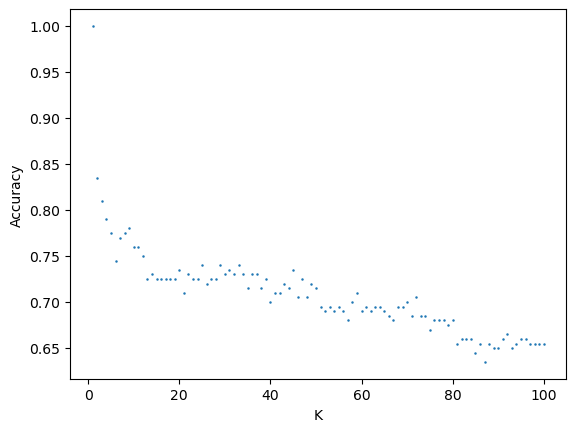

In [14]:
plt.scatter(a,cogs,s=0.6)
plt.xlabel("K")
plt.ylabel("Accuracy")

In [15]:
def generate_test(means):
    points = []
    for m in means:        
        for i in range(1000):
            z = scipy.stats.multivariate_normal.rvs(mean=[m[0],m[1]], cov=np.array([[1/3, 0], [0, 1/3]]), size=1)
            points.append(z)
    return(points)

In [16]:
t1 = np.array(generate_test(means_1))
t2 = np.array(generate_test(means_2))

In [17]:
test=np.concatenate((t1, t2))

In [18]:
len(test)

20000

In [19]:
label=[]
for i in range(10000):
    label.append(0)
for j in range(10000):
    label.append(1)

In [20]:
x = test[:,0]
y = test[:,1]
value = {"X": x, "Y": y}
test_df = pd.DataFrame(value)

In [21]:
zed = test_df[["X","Y"]].values

In [25]:
dogs = []
for i in range(1,101):
    fit = KNeighborsClassifier(n_neighbors=i).fit(Z, labels)
    g = fit.predict(test_df[["X","Y"]])
    x5 = metrics.confusion_matrix(label, g)
    z = (x5[0][0]+x5[1][1])/20000
    dogs.append(z)

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sk

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sk

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sk

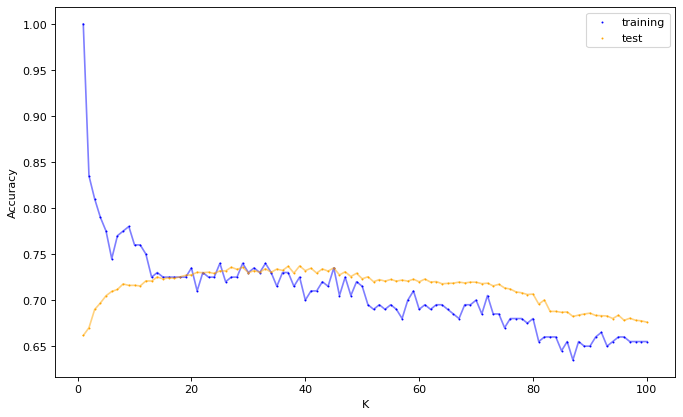

In [32]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
plt.scatter(a,cogs,s=0.6, c="blue", label="training")
plt.plot(a,cogs, c="blue", alpha=0.5)
plt.scatter(a,dogs,s=0.6, c="orange", label="test")
plt.plot(a,dogs, c="orange", alpha=0.5)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()

In [33]:
!pip install python-mnist

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install python-mnist

from mnist.loader import MNIST
mndata = MNIST('./GZIP')
images, labels = mndata.load_training()
testX, testY = mndata.load_testing()

images = np.array(images)
labels = np.array(labels)
testX = np.array(testX)
testY= np.array(testY)

In [3]:
images.shape, labels.shape, testX.shape, testY.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [19]:
digit = labels

In [20]:
digit[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [21]:
digits = np.array(images)

In [22]:
digits.shape

(60000, 784)

In [8]:
p = np.reshape(digits, newshape=( 60000, 28,28))

In [9]:
p.shape

(60000, 28, 28)

In [93]:
len(digit)

60000

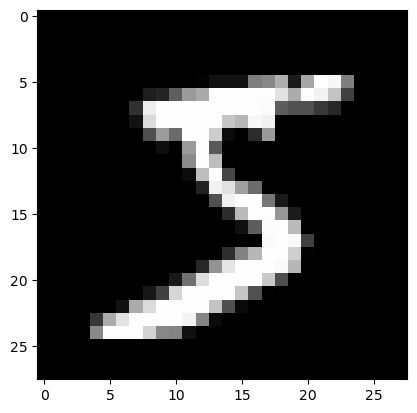

In [12]:
plt.imshow(p[0,::], cmap="gray")

In [ ]:
for i in range(0,10):
    for q in range(len(digit)):
        j=0
        while j<4
            if digit[q] == i:
                plt.imshow(p[q,::], cmap="gray")
                j+=1

In [50]:
def first_four(x):
    agg = []
    while len(agg)<4:
        for q in range(len(digit)):
            if digit[q] == x:
                agg.append(q)
                if len(agg)==4:
                    break
    return(agg)

In [86]:
def display(x):
    agg=first_four(x)
    plt.subplot(10,4,1+4*x)
    plt.imshow(p[agg[0],::])
    plt.axis('off')
    plt.subplot(10,4,2+4*x)
    plt.imshow(p[agg[1],::])
    plt.axis('off')
    plt.subplot(10,4,3+4*x)
    plt.imshow(p[agg[2],::])
    plt.axis('off')
    plt.subplot(10,4,4+4*x)
    plt.imshow(p[agg[3],::])
    plt.axis('off')

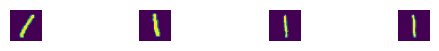

In [87]:
display(1)

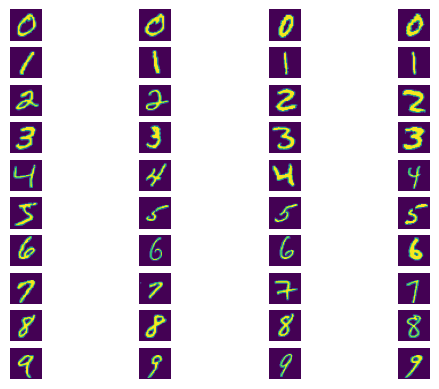

In [88]:
for i in range(10):
    display(i)

In [34]:
from collections import Counter
Counter(digit)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [99]:
encoder_df = pd.DataFrame(encoder.fit_transform(p).toarray())

ValueError: Found array with dim 3. None expected <= 2.

In [123]:
df = pd.DataFrame({'Digit': digit})
df

,Digit
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [89]:
from sklearn.preprocessing import OneHotEncoder

In [124]:
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Digit']]).toarray())

In [125]:
final_df = df.join(encoder_df)

In [126]:
final_df

,Digit,0,1,2,3,4,5,6,7,8,9
0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59998,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [90]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [114]:
diglets = []
for i in range(len(p)):
    a = np.concatenate( p[i], axis=0 )
    diglets.append(a)

In [116]:
df["Dots"] = diglets

In [117]:
df

,Digit,Dots
0,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
59995,8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
59996,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
59997,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
59998,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [118]:
zero=df[df["Digit"]==0]
zero

,Digit,Dots
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
21,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
34,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
37,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
51,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
59940,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
59944,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
59952,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
59972,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [122]:
zero = digit.loc(0)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [129]:
man = LinearDiscriminantAnalysis()
man.fit(diglets, final_df[0])
dan = LinearDiscriminantAnalysis()
dan.fit(diglets, final_df[1])
jack = LinearDiscriminantAnalysis()
jack.fit(diglets, final_df[2])
ace = LinearDiscriminantAnalysis()
ace.fit(diglets, final_df[3])
taro = LinearDiscriminantAnalysis()
taro.fit(diglets, final_df[4])
leo = LinearDiscriminantAnalysis()
leo.fit(diglets, final_df[5])
eighty = LinearDiscriminantAnalysis()
eighty.fit(diglets, final_df[6])
tiga = LinearDiscriminantAnalysis()
tiga.fit(diglets, final_df[7])
dyna = LinearDiscriminantAnalysis()
dyna.fit(diglets, final_df[8])
gaia = LinearDiscriminantAnalysis()
gaia.fit(diglets, final_df[9])

LinearDiscriminantAnalysis()

In [136]:
worm = []
for i in range(len(q)):
    a = np.concatenate( q[i], axis=0 )
    worm.append(a)

In [131]:
man.intercept_

array([-11.19410472])

In [ ]:
testX = np.array(testX)
testY= np.array(testY)

In [134]:
q = np.reshape(testX, newshape=( 10000, 28,28))

In [157]:
def calcs(x):
    a=man.intercept_+np.dot(x,man.coef_[0])
    b=dan.intercept_+np.dot(x,dan.coef_[0])
    c=jack.intercept_+np.dot(x,jack.coef_[0])
    d=ace.intercept_+np.dot(x,ace.coef_[0])
    e=taro.intercept_+np.dot(x,taro.coef_[0])
    f=leo.intercept_+np.dot(x,leo.coef_[0])
    g=eighty.intercept_+np.dot(x,eighty.coef_[0])
    h=tiga.intercept_+np.dot(x,tiga.coef_[0])
    i=dyna.intercept_+np.dot(x,dyna.coef_[0])
    j=gaia.intercept_+np.dot(x,gaia.coef_[0])
    log=[a[0],b[0],c[0],d[0],e[0],f[0],g[0],h[0],i[0],j[0]]
    return(log)

In [161]:
def agul(x):
    log = calcs(x)
    g = np.argmax(log)
    return(g)

In [158]:
g = calcs(worm[0])
g

[-16.3488238732197,
 -14.626686831807628,
 -8.443007344078573,
 -6.955321849338976,
 -13.138863162210388,
 -8.432853169938111,
 -17.362905039831052,
 14.084155863864707,
 -9.695762468544748,
 -6.1466445195854735]

In [156]:
g[0][0]

-16.3488238732197

In [163]:
len(worm)

10000

In [164]:
zoffy=[]
for i in worm:
    g=agul(i)
    zoffy.append(g)

In [167]:
from sklearn import metrics

In [169]:
dad = metrics.confusion_matrix(testY, zoffy)
dad

array([[ 937,    0,    3,    3,    3,    9,   13,    2,    9,    1],
       [   0, 1090,    2,    3,    2,    5,    5,    0,   27,    1],
       [  16,   34,  804,   31,   19,    5,   40,   18,   55,   10],
       [   4,    7,   22,  883,    5,   23,    5,   16,   29,   16],
       [   0,   15,    8,    1,  881,    5,    7,    2,   15,   48],
       [   9,   10,    3,   56,   20,  701,   17,   11,   45,   20],
       [  16,    9,   10,    0,   29,   31,  848,    0,   15,    0],
       [   4,   30,   11,    9,   25,    4,    0,  868,    7,   70],
       [   7,   26,    8,   27,   22,   52,   12,    5,  787,   28],
       [  10,    8,    1,   14,   66,    5,    0,   58,   13,  834]])

In [173]:
a=0
for i in range(10):
    b=dad[i][i]
    a+=b/10000
print("The crude accuracy of the unregularized linear regression in predicting test data is", a)

The crude accuracy of the unregularized linear regression in predicting test data is 0.8633000000000001


In [174]:
belial=[]
for i in diglets:
    g=agul(i)
    belial.append(g)

In [177]:
mom = metrics.confusion_matrix(digit, belial)
mom

array([[5592,    5,   22,   24,   37,   63,   52,    2,  104,   22],
       [   0, 6446,   36,   19,   18,   58,    9,   10,  133,   13],
       [  63,  203, 4778,  172,  121,   31,  212,   72,  267,   39],
       [  16,   96,  164, 5183,   31,  188,   27,   88,  180,  158],
       [   6,   77,   37,    4, 5175,   64,   27,    9,   86,  357],
       [  72,   57,   23,  366,   83, 4240,  132,   31,  268,  149],
       [  78,   56,   71,    5,   93,  134, 5399,    0,   71,   11],
       [  45,  152,   34,   59,  182,   15,    2, 5272,   22,  482],
       [  34,  330,   49,  215,   84,  274,   31,   13, 4615,  206],
       [  44,   32,   18,  108,  333,   23,    0,  379,   63, 4949]])

In [180]:
c=0
for i in range(10):
    b=mom[i][i]
    c+=b/60000
print("The crude accuracy of the unregularized linear regression in predicting training data is", c)

The crude accuracy of the unregularized linear regression in predicting training data is 0.8608166666666667
